# SVM and The Kernel Trick 

## Oshri Fatkiev

In this notebook, we are going to use two learning algorithms - Perceptron and AdaTron
1. Linear separation using linear kernel 
    1. The number of SVM's as a function of the number of samples
    2. Generalization preformence of $\vec{\omega}^{*}$ as a function of the number of samples
    3. Comparison between **AdaTron** and **Perceptron** algorithms
    4. Plotting the cosine distance between  $\vec{\omega}^{*}$ and the true plane
2. Nonlinear separation using linear kernel

---

## Linear separation using linear kernel

First, let us load the libraries and algorithms we need

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.io import loadmat
from adatron import adatron
plt.style.use(['science', 'notebook', 'grid'])

Next, we load the file contains the data we are going to work with 

In [2]:
filename = 'data_10D.mat'
M = loadmat(filename)

### 1. The number of SVM's as a function of the number of samples

Before we begin, let's write a function `train_test_split` that recieves the data `M` and the number of samples we want for training `P`, and randomly chooses the training set (and thus the testing set as well)

In [3]:
def train_test_split(M, P):
    shuffled_idxs = np.random.permutation(len(M['y0']))
    train_idxs, test_idxs = shuffled_idxs[:P], shuffled_idxs[P:]
    X_train, X_test = M['X'][:, train_idxs], M['X'][:, test_idxs]
    y_train, y_test = M['y0'][train_idxs], M['y0'][test_idxs]
    return X_train, X_test, y_train, y_test

Now we are ready to start our computations. Our first goal is to try to determine the relation between the average number of SVM's (support vector machines) needed for the solution and the number of samples `P`.

In [4]:
Ps = [10, 50, 100, 300]
N_REPS = 1

n_SVMs = np.zeros(len(Ps))
for i,P in enumerate(Ps):
    print(r'P={}'.format(P))
    svm_stats = np.zeros(N_REPS)
    for j in np.arange(N_REPS):
        X_train, X_test, y_train, y_test = train_test_split(M, P)
        K = X_train.T @ X_train
        converged, A = adatron(K, y_train)
        if converged:
            svm_stats[j] = len(A[-1] > 0)
    n_SVMs[i] = np.mean(svm_stats) # should I take only those that converged? [np.nonzero(svm_stats)]?
        
print('Done!')

P=10
P=50
P=100
P=300
Done!


Plotting the number of support vectors `n_SVMs` as a function of `P` we get

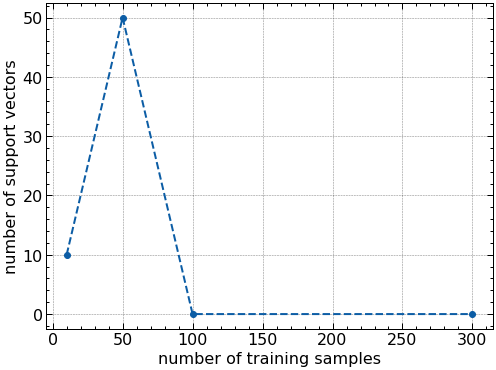

In [7]:
plt.plot(Ps, n_SVMs, '--o')
plt.xlabel(r'number of training samples')
plt.ylabel(r'number of support vectors')
plt.show()

As we can see... 

### 2. Generalization preformence of $\vec{\omega}^{*}$ as a function of the number of samples
Next, let's see what is the generalization preformence of the optimal solution as a function of `P` 

No suprises here...

### 3. Comparison between AdaTron and Perceptron algorithms

In [6]:
# comparing perceptron and adatron
from perceptron import perceptron

ModuleNotFoundError: No module named 'perceptron'

And of course...

### 4. Plotting the cosine distance between $\vec{\omega}^{*}$ and the true plane

In [ ]:
# bonus question

## Nonlinear separation using the kernel trick